In [1]:
import os
import json
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'/Users/minjshin/Desktop/eecs498_mlre/MLRE-REPLICATION-ICML-2023-Route-interpret-repeat/src/codebase/data_preprocessing'

In [3]:
os.chdir('../../../data/CUB_200_2011/')


In [4]:
os.getcwd()

'/Users/minjshin/Desktop/eecs498_mlre/MLRE-REPLICATION-ICML-2023-Route-interpret-repeat/data/CUB_200_2011'

# Load Attributes
## Add original_attributes.npy and classes.txt, image_class_labels.txt to CUB_200_2011/

In [14]:
attr = np.load("attributes.npy")

In [15]:
attr

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]], shape=(11788, 108))

In [16]:
np.sum(attr[0, :] != attr[1, :])

np.int64(0)

In [17]:
og_attr = np.load("original_attributes.npy")

In [18]:
og_attr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(11788, 312))

In [19]:
np.sum(og_attr[0, :] != og_attr[1, :])

np.int64(39)

In [9]:
# True means to filter out
attr_filter = np.load("attr_filter.npy")
attr_filter

array([ True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,

In [13]:
attr_filter.shape

(312,)

In [14]:
np.sum(attr_filter)

np.int64(204)

In [20]:
og_attr_filtered = og_attr[:, ~attr_filter]

In [21]:
og_attr_filtered.shape

(11788, 108)

# Explore modified dataset

In [80]:
from matplotlib import pyplot as plt

In [81]:
attr_corrections = list()
for i in range(attr.shape[0]):
    attr_corrections.append(sum(attr[i, :] != og_attr_filtered[i, :]))
print("lowest # of corrections: ", min(attr_corrections), "highest # of corrections: ", max(attr_corrections))

lowest # of corrections:  0 highest # of corrections:  60


In [82]:
attr_corr_arr = np.array(attr_corrections)
attr_corr_arr

array([10, 27, 18, ..., 13, 23, 40], shape=(11788,))

In [83]:
highest_10th_corrections = np.percentile(attr_corr_arr, 90)
highest_10th_corrections

np.float64(30.0)

In [84]:
np.sum(attr_corr_arr >= 54)

np.int64(5)

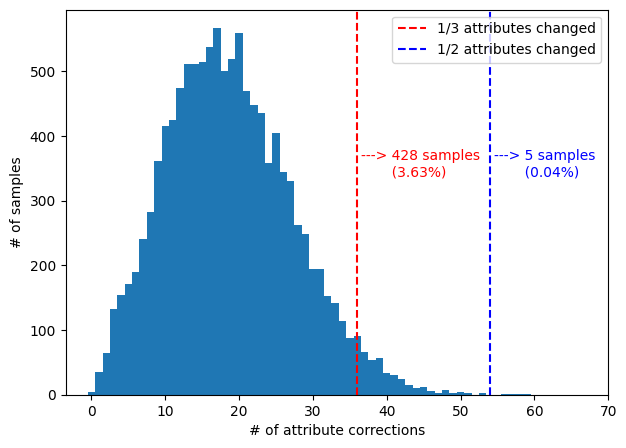

In [85]:
plt.figure(figsize=(7,5))
plt.hist(attr_corrections, bins=np.arange(min(attr_corrections), max(attr_corrections) + 1) - 0.5)
plt.xlim(right=70)
plt.xlabel("# of attribute corrections")
plt.ylabel("# of samples")

line1_x_position = 36
plt.axvline(x=line1_x_position, color='r', linestyle='--', label='1/3 attributes changed')
plt.text(line1_x_position + 0.5, plt.ylim()[1] * 0.6, '---> 428 samples\n       (3.63%)', va='center', ha='left', color='r')

line2_x_position = 54
plt.axvline(x=line2_x_position, color='b', linestyle='--', label='1/2 attributes changed')
plt.text(line2_x_position + 0.5, plt.ylim()[1] * 0.6, '---> 5 samples\n       (0.04%)', va='center', ha='left', color='b')
plt.legend()

plt.show()

# Create adversarial dataset

In [86]:
np.sum(attr[0, :] != attr[60, :])

np.int64(13)

In [87]:
indices = np.where(attr_corr_arr >= 36)[0]
indices

array([    7,   165,   389,   430,   441,   446,   550,   551,   571,
         576,   579,   597,   663,   769,   815,  1061,  1075,  1154,
        1167,  1189,  1200,  1208,  1217,  1237,  1355,  1403,  1415,
        1463,  1489,  1512,  1523,  1525,  1550,  1563,  1564,  1578,
        1772,  1874,  1916,  1931,  2099,  2112,  2133,  2160,  2172,
        2204,  2210,  2213,  2224,  2232,  2235,  2238,  2255,  2272,
        2280,  2411,  2434,  2439,  2443,  2444,  2454,  2532,  2541,
        2552,  2565,  2569,  2585,  2615,  2674,  2676,  2717,  2747,
        2813,  2834,  2843,  2858,  2917,  2918,  2926,  2939,  2941,
        2944,  2952,  2994,  2995,  3008,  3135,  3167,  3175,  3182,
        3279,  3315,  3319,  3336,  3353,  3381,  3466,  3472,  3492,
        3525,  3536,  3583,  3641,  3719,  3727,  3747,  3760,  3792,
        3807,  3861,  3862,  3878,  3942,  3979,  3994,  4013,  4086,
        4088,  4104,  4139,  4140,  4151,  4153,  4165,  4194,  4204,
        4238,  4242,

In [88]:
np.where(attr_corr_arr >= 54)[0]

array([3583, 5328, 5378, 6352, 6447])

In [98]:
classes_file = "classes.txt"
img_class_label_file = "image_class_labels.txt"

# os.chdir('../')  # cwd = ./data/CUB_200_2011
if not os.path.exists(f'{classes_file}') or not os.path.exists(f'{img_class_label_file}') :
    print("Files don't exist")
    exit(1)

In [100]:
# ----- Load class folder names -----
def load_class_map(classes_file):
    class_map = {}
    with open(f'{classes_file}', "r") as f:
        for line in f:
            class_id, class_name = line.strip().split()
            class_map[int(class_id)] = class_name
    return class_map

class_map = load_class_map(classes_file)
pprint(class_map)

# ----- Load img id (index start at 1) to class mapping -----
def load_img_class_map(img_class_label_file):
    img_class_map = {}
    with open(f'{img_class_label_file}', "r") as f:
        for line in f:
            img_id, class_id = line.strip().split()
            img_class_map[int(img_id)] = class_id
    return img_class_map

img_class_map = load_img_class_map(img_class_label_file)
pprint(img_class_map)

{1: '001.Black_footed_Albatross',
 2: '002.Laysan_Albatross',
 3: '003.Sooty_Albatross',
 4: '004.Groove_billed_Ani',
 5: '005.Crested_Auklet',
 6: '006.Least_Auklet',
 7: '007.Parakeet_Auklet',
 8: '008.Rhinoceros_Auklet',
 9: '009.Brewer_Blackbird',
 10: '010.Red_winged_Blackbird',
 11: '011.Rusty_Blackbird',
 12: '012.Yellow_headed_Blackbird',
 13: '013.Bobolink',
 14: '014.Indigo_Bunting',
 15: '015.Lazuli_Bunting',
 16: '016.Painted_Bunting',
 17: '017.Cardinal',
 18: '018.Spotted_Catbird',
 19: '019.Gray_Catbird',
 20: '020.Yellow_breasted_Chat',
 21: '021.Eastern_Towhee',
 22: '022.Chuck_will_Widow',
 23: '023.Brandt_Cormorant',
 24: '024.Red_faced_Cormorant',
 25: '025.Pelagic_Cormorant',
 26: '026.Bronzed_Cowbird',
 27: '027.Shiny_Cowbird',
 28: '028.Brown_Creeper',
 29: '029.American_Crow',
 30: '030.Fish_Crow',
 31: '031.Black_billed_Cuckoo',
 32: '032.Mangrove_Cuckoo',
 33: '033.Yellow_billed_Cuckoo',
 34: '034.Gray_crowned_Rosy_Finch',
 35: '035.Purple_Finch',
 36: '036.No

In [101]:
# Code for creating adv_dataset, make sure to have adv_set d
# import shutil

# # Map each image row to its folder
# class_labels = [img_class_map[adv_idx+1] for adv_idx in indices]

# # ----- Copy images -----
# for idx, class_label in zip(indices, class_labels):
#     # Convert matrix index (0-based) to filename index (1-based)
#     image_number = idx + 1
#     fname = f"{image_number:05d}.jpg"

#     class_name = class_map[int(class_label)]
#     src = os.path.join(existing_data_root, class_name, fname)

#     dst_dir = os.path.join("adv_set", class_name)
#     os.makedirs(dst_dir, exist_ok=True)
#     dst = os.path.join(dst_dir, fname)

#     shutil.copy2(src, dst)


# Select images to show denoising process

In [169]:
attr_names = []
with open("attributes_names.txt", 'r') as f:
    content = f.read()
    content = content.strip()
    content = content.strip("[]")
    parts = content.split(",")
    attr_names = [p.strip().strip("'").strip('"').replace("\\n","").replace("\n","") for p in parts]
# [(i, name) for i, name in enumerate(attr_names)]
attr_names

['has_bill_shape::dagger',
 'has_bill_shape::hooked_seabird',
 'has_bill_shape::all-purpose',
 'has_bill_shape::cone',
 'has_wing_color::brown',
 'has_wing_color::grey',
 'has_wing_color::yellow',
 'has_wing_color::black',
 'has_wing_color::white',
 'has_wing_color::buff',
 'has_upperparts_color::brown',
 'has_upperparts_color::grey',
 'has_upperparts_color::yellow',
 'has_upperparts_color::black',
 'has_upperparts_color::white',
 'has_upperparts_color::buff',
 'has_underparts_color::brown',
 'has_underparts_color::grey',
 'has_underparts_color::yellow',
 'has_underparts_color::black',
 'has_underparts_color::white',
 'has_underparts_color::buff',
 'has_breast_pattern::solid',
 'has_breast_pattern::striped',
 'has_breast_pattern::multi-colored',
 'has_back_color::brown',
 'has_back_color::grey',
 'has_back_color::yellow',
 'has_back_color::black',
 'has_back_color::white',
 'has_back_color::buff',
 'has_tail_shape::notched_tail',
 'has_upper_tail_color::brown',
 'has_upper_tail_color::

# of diff attrs bw two birds when denoised =  0
# of og diff attrs bw two birds (X denoised) =  53


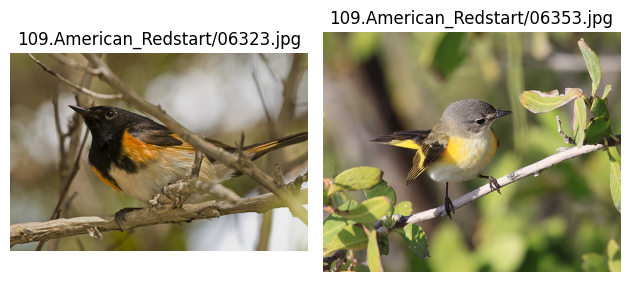

In [185]:
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

bird_one_id, bird_two_id = 6323, 6353  # needs to be in same class
print("# of diff attrs bw two birds when denoised = ", np.sum(attr[bird_one_id-1, :] != attr[bird_two_id-1, :]))
print("# of og diff attrs bw two birds (X denoised) = ", np.sum(og_attr_filtered[bird_one_id-1, :] != og_attr_filtered[bird_two_id-1, :]))

def img_path(bird_id: int):
    fname = f"{bird_id:05d}.jpg"
    class_name = class_map.get(int(img_class_map.get(bird_id)))
    return os.path.join(class_name, fname)

img1 = mpimg.imread(img_path(bird_one_id))
img2 = mpimg.imread(img_path(bird_two_id))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1)
ax1.set_title(img_path(bird_one_id))
ax1.axis('off')

ax2.imshow(img2)
ax2.set_title(img_path(bird_two_id))
ax2.axis('off')
plt.tight_layout()
plt.show()

In [186]:
def get_idx_diff_attr(bird_id: int):
    bird_idx_diff_attr = np.where(attr[bird_id-1, :] != og_attr_filtered[bird_id-1, :])[0].tolist()
    print(f"# of attrs switched when denoising id {bird_id} =", len(bird_idx_diff_attr))
    bird_idx_diff_attr = [("added" if (attr[bird_id-1, idx] and not og_attr_filtered[bird_id-1, idx]) \
                                     else ("removed" if not attr[bird_id-1, idx] and og_attr_filtered[bird_id-1, idx] \
                                          else "?"), 
                               idx, attr_names[idx]) for idx in bird_idx_diff_attr]
    return bird_idx_diff_attr

In [187]:
get_idx_diff_attr(bird_one_id)

# of attrs switched when denoising id 6323 = 5


[('removed', 17, 'has_underparts_color::grey'),
 ('added', 28, 'has_back_color::black'),
 ('added', 37, 'has_head_pattern::plain'),
 ('added', 78, 'has_size::small_(5_-_9_in)'),
 ('removed', 80, 'has_size::very_small_(3_-_5_in)')]

In [188]:
get_idx_diff_attr(bird_two_id)

# of attrs switched when denoising id 6353 = 56


[('removed', 4, 'has_wing_color::brown'),
 ('removed', 5, 'has_wing_color::grey'),
 ('added', 7, 'has_wing_color::black'),
 ('removed', 9, 'has_wing_color::buff'),
 ('removed', 10, 'has_upperparts_color::brown'),
 ('removed', 11, 'has_upperparts_color::grey'),
 ('added', 13, 'has_upperparts_color::black'),
 ('removed', 15, 'has_upperparts_color::buff'),
 ('removed', 16, 'has_underparts_color::brown'),
 ('added', 19, 'has_underparts_color::black'),
 ('added', 20, 'has_underparts_color::white'),
 ('removed', 21, 'has_underparts_color::buff'),
 ('removed', 25, 'has_back_color::brown'),
 ('removed', 26, 'has_back_color::grey'),
 ('added', 28, 'has_back_color::black'),
 ('removed', 30, 'has_back_color::buff'),
 ('added', 31, 'has_tail_shape::notched_tail'),
 ('removed', 32, 'has_upper_tail_color::brown'),
 ('removed', 33, 'has_upper_tail_color::grey'),
 ('added', 34, 'has_upper_tail_color::black'),
 ('removed', 36, 'has_upper_tail_color::buff'),
 ('added', 37, 'has_head_pattern::plain'),
 (

In [201]:
redstarts_id = range(6323, 6382+1)  # class = 109
redstarts_attrs = attr[6323-1]  # First American_Redstart bird
print(attr_names[54], "|", attr_names[56],"|", attr_names[57])
print(redstarts_attrs[54], "\t\t\t\t", redstarts_attrs[56], "\t\t\t\t", redstarts_attrs[57])

has_forehead_color::grey | has_forehead_color::black | has_forehead_color::white
0.0 				 1.0 				 0.0


In [215]:
redstarts_female_id = [6324, 6342, 6343, 6352, 6353]
redstarts_female_mismatches = []
for id_num in redstarts_female_id:
    mismatch = int(sum(attr[id_num-1, :] != og_attr_filtered[id_num-1, :]))
    redstarts_female_mismatches.append(mismatch)
    print(f'{id_num} : {mismatch}')
    print(og_attr_filtered[id_num-1, 54], og_attr_filtered[id_num-1, 56], og_attr_filtered[id_num-1, 57])

np.average(redstarts_female_mismatches)

6324 : 31
1.0 0.0 0.0
6342 : 26
1.0 0.0 1.0
6343 : 33
1.0 0.0 0.0
6352 : 29
1.0 0.0 0.0
6353 : 56
1.0 0.0 0.0


np.float64(35.0)

In [217]:
redstarts_male_mismatches = []
for id_num in redstarts_id:
    if id_num not in redstarts_female_id:
        mismatch = int(sum(attr[id_num-1, :] != og_attr_filtered[id_num-1, :]))
        redstarts_male_mismatches.append(mismatch)
        print(f'{id_num} : {int(sum(attr[id_num-1, :] != og_attr_filtered[id_num-1, :]))}')
        print(og_attr_filtered[id_num-1, 54], og_attr_filtered[id_num-1, 56], og_attr_filtered[id_num-1, 57])

np.average(redstarts_male_mismatches)

6323 : 5
0.0 1.0 0.0
6325 : 15
0.0 1.0 0.0
6326 : 4
0.0 1.0 0.0
6327 : 11
0.0 1.0 0.0
6328 : 13
0.0 1.0 0.0
6329 : 21
0.0 1.0 0.0
6330 : 17
0.0 1.0 0.0
6331 : 35
0.0 0.0 0.0
6332 : 14
0.0 1.0 0.0
6333 : 16
0.0 1.0 0.0
6334 : 31
0.0 0.0 0.0
6335 : 13
0.0 1.0 0.0
6336 : 12
0.0 1.0 0.0
6337 : 10
0.0 1.0 0.0
6338 : 9
0.0 1.0 0.0
6339 : 21
0.0 1.0 0.0
6340 : 24
1.0 0.0 0.0
6341 : 11
0.0 1.0 0.0
6344 : 12
0.0 1.0 0.0
6345 : 12
0.0 1.0 0.0
6346 : 7
0.0 1.0 0.0
6347 : 23
0.0 0.0 0.0
6348 : 11
0.0 1.0 0.0
6349 : 16
0.0 1.0 0.0
6350 : 9
0.0 1.0 0.0
6351 : 11
0.0 1.0 0.0
6354 : 11
0.0 1.0 0.0
6355 : 15
0.0 1.0 0.0
6356 : 22
1.0 1.0 0.0
6357 : 9
0.0 1.0 0.0
6358 : 14
0.0 1.0 0.0
6359 : 17
0.0 1.0 0.0
6360 : 20
0.0 1.0 0.0
6361 : 6
0.0 1.0 0.0
6362 : 11
0.0 1.0 0.0
6363 : 11
0.0 1.0 0.0
6364 : 19
0.0 1.0 0.0
6365 : 14
0.0 1.0 0.0
6366 : 18
0.0 1.0 0.0
6367 : 12
0.0 1.0 0.0
6368 : 6
0.0 1.0 0.0
6369 : 11
0.0 1.0 0.0
6370 : 20
0.0 1.0 0.0
6371 : 34
0.0 0.0 0.0
6372 : 9
0.0 1.0 0.0
6373 : 34
0.0 0.0 0

np.float64(15.036363636363637)

In [206]:
def print_attribute_diff_table(attr_map, original, *object_arrays, object_names=None):
    """
    Print a table of attribute differences vs an original boolean array.
    
    Parameters
    ----------
    attr_map : dict
        Maps attr_id -> attr_name. Keys can be int or str.
    original : np.ndarray (1D, bool)
        The reference/original boolean values.
    *object_arrays : np.ndarray
        Any number of 1D boolean arrays, one per object.
    object_names : list of str, optional
        Names for each object (columns). If None, uses "object_1", "object_2", ...
    """
    # Ensure numpy arrays and 1D
    original = np.asarray(original).astype(bool)
    objs = [np.asarray(a).astype(bool) for a in object_arrays]

    # Shape checks
    for i, arr in enumerate(objs):
        if arr.shape != original.shape:
            raise ValueError(f"Object array {i} has shape {arr.shape}, expected {original.shape}")

    n_attrs = original.shape[0]

    if object_names is None:
        object_names = [f"object_{i+1}" for i in range(len(objs))]
    elif len(object_names) != len(objs):
        raise ValueError("Length of object_names must match number of object_arrays")

    # Build rows: only include attributes where any object differs from original
    header = ["(attr idx, attr name)", "class value"] + object_names
    rows = []

    for idx in range(n_attrs):
        orig_val = bool(original[idx])

        # Compute each object's cell: blank if same as original, value if different
        obj_cells = []
        show_row = False
        for arr in objs:
            val = bool(arr[idx])
            if val != orig_val:
                show_row = True
                obj_cells.append(str(val))
            else:
                obj_cells.append("")  # omit if no change

        if not show_row:
            continue  # skip this attribute entirely

        # Get attribute name from attr_map (support int or str keys)
        attr_name = (
            attr_map.get(idx) 
            if idx in attr_map 
            else attr_map.get(str(idx), f"attr_{idx}")
        )
        attr_label = f"({idx}, {attr_name})"
        row = [attr_label, str(orig_val)] + obj_cells
        rows.append(row)

    # If nothing to show
    if not rows:
        print("No attributes differ from the original.")
        return

    # Compute column widths for pretty printing
    table = [header] + rows
    col_widths = [max(len(str(row[c])) for row in table) for c in range(len(header))]

    def format_row(row):
        return " | ".join(str(cell).ljust(col_widths[i]) for i, cell in enumerate(row))

    # Print table
    print(format_row(header))
    print("-" * (sum(col_widths) + 3 * (len(col_widths) - 1)))
    for row in rows:
        print(format_row(row))


In [172]:
attr_names_dict = dict(enumerate(attr_names))

In [207]:
print_attribute_diff_table(attr_names_dict, redstarts_attrs, og_attr_filtered[6322], og_attr_filtered[6352], object_names=['06323.jpg', '06353.jpg'])

(attr idx, attr name)                  | class value | 06323.jpg | 06353.jpg
----------------------------------------------------------------------------
(4, has_wing_color::brown)             | False       |           | True     
(5, has_wing_color::grey)              | False       |           | True     
(7, has_wing_color::black)             | True        |           | False    
(9, has_wing_color::buff)              | False       |           | True     
(10, has_upperparts_color::brown)      | False       |           | True     
(11, has_upperparts_color::grey)       | False       |           | True     
(13, has_upperparts_color::black)      | True        |           | False    
(15, has_upperparts_color::buff)       | False       |           | True     
(16, has_underparts_color::brown)      | False       |           | True     
(17, has_underparts_color::grey)       | False       | True      |          
(19, has_underparts_color::black)      | True        |           | False    